### EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_clean = pd.read_csv(filepath_or_buffer= "../data/Clean_Dataset.csv") 
df_clean

,Category,Rating,Rating Count,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Entertainment,3.9,68.0,1,0.0,Everyone,0,0,0
1,Lifestyle,0.0,0.0,1,0.0,Everyone,0,0,0
2,Shopping,4.3,918.0,1,0.0,Everyone,1,0,0
3,Finance,5.0,6.0,1,0.0,Everyone,0,0,0
4,Food & Drink,4.3,830.0,1,0.0,Everyone,1,0,0
...,...,...,...,...,...,...,...,...,...
9658,Music,0.0,0.0,1,0.0,Everyone,0,0,0
9659,Education,4.3,142.0,1,0.0,Everyone,0,0,0
9660,Music & Audio,5.0,9.0,1,0.0,Teen,1,0,0
9661,Entertainment,0.0,0.0,1,0.0,Everyone,1,0,0


In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9663 entries, 0 to 9662
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9663 non-null   object 
 1   Rating            9663 non-null   float64
 2   Rating Count      9663 non-null   float64
 3   Free              9663 non-null   int64  
 4   Price             9663 non-null   float64
 5   Content Rating    9663 non-null   object 
 6   Ad Supported      9663 non-null   int64  
 7   In App Purchases  9663 non-null   int64  
 8   Editors Choice    9663 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 679.6+ KB


### Step 1: Univariate Analysis

State clearly as part of your univariate analysis which one is your target columns, what type of data it is, and hence what type of machine learning problem you are facing.

Our target colums is Rating and it is the average rating of an applications. The data type of this column is a float. 

At the start of the univariate analysis, add a paragraph discussing why we should treat numerical and categorical variables separately when doing data exploration.

We are analysing our categorical and numerical data to understand them more and also to see how are they distibuted. 

#### Categorical

In [5]:
categorical_df = df_clean.select_dtypes('object').copy()
categorical_df.head()

,Category,Content Rating
0,Entertainment,Everyone
1,Lifestyle,Everyone
2,Shopping,Everyone
3,Finance,Everyone
4,Food & Drink,Everyone


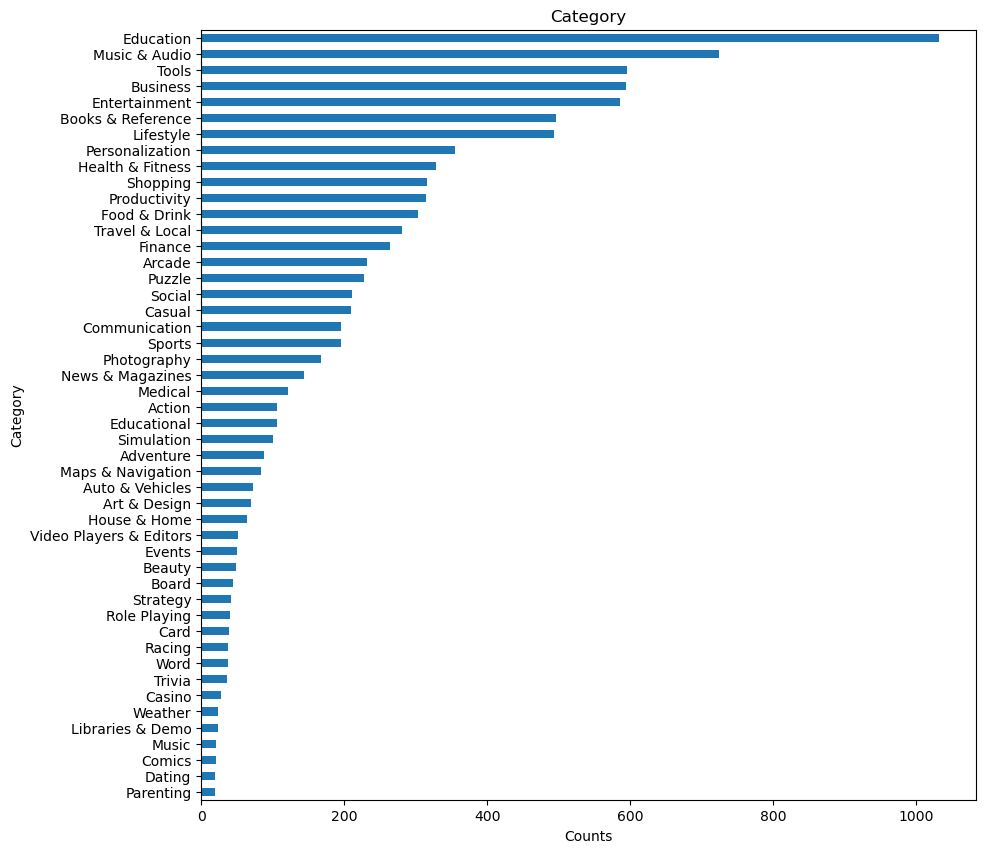

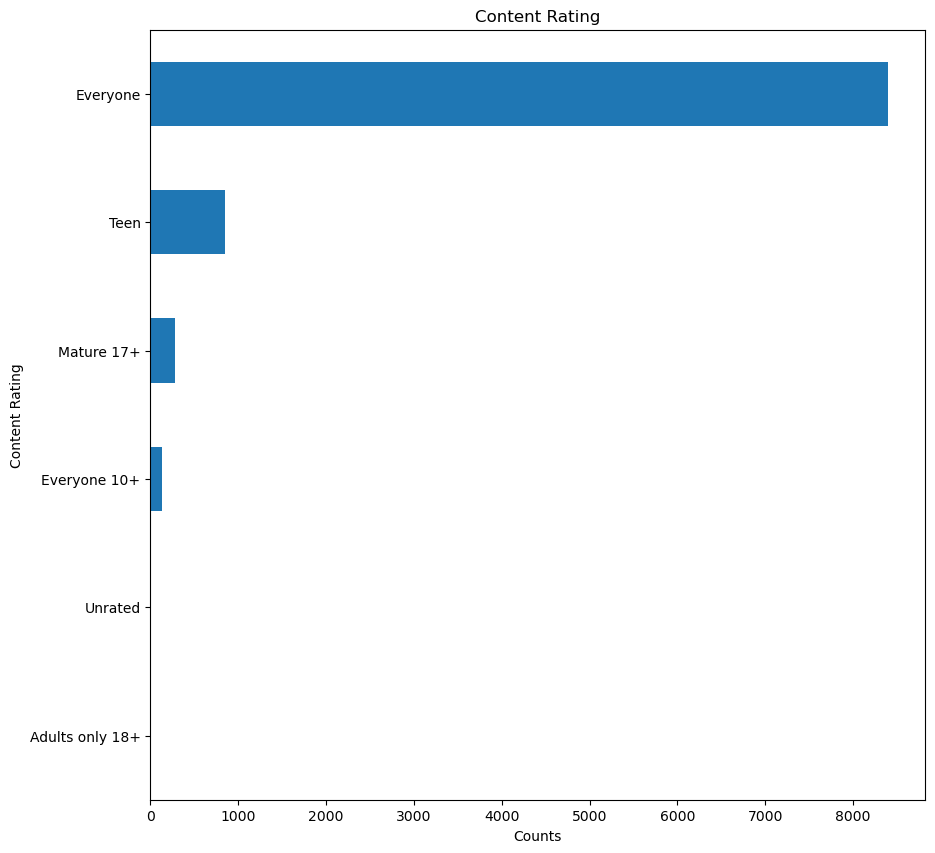

In [6]:
for column in categorical_df.columns:
    plt.figure(figsize=(10,10))
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.xlabel("Counts")
    plt.title(column)
    plt.show()

We can see that there is lots of education application and there is few parenting applications. 
Most of the applications is for everyone and there is less application for everyone that is over 10 years old. 

#### Numerical 

In [7]:
df_clean.describe()

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice
count,9663.000000,9.663000e+03,9663.000000,9663.000000,9663.00000,9663.000000,9663.000000
mean,2.214695,1.423607e+03,0.983649,0.109652,0.50978,0.088378,0.000103
std,2.110918,2.387508e+04,0.126828,3.087679,0.49993,0.283859,0.010173
min,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000e+00,1.000000,0.000000,0.00000,0.000000,0.000000
50%,3.000000,6.000000e+00,1.000000,0.000000,1.00000,0.000000,0.000000
75%,4.300000,4.000000e+01,1.000000,0.000000,1.00000,0.000000,0.000000
max,5.000000,1.569485e+06,1.000000,269.990000,1.00000,1.000000,1.000000


In [8]:
numeric_df = df_clean.select_dtypes(['int32','float64', 'int64']).copy()
numeric_df.head()

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice
0,3.9,68.0,1,0.0,0,0,0
1,0.0,0.0,1,0.0,0,0,0
2,4.3,918.0,1,0.0,1,0,0
3,5.0,6.0,1,0.0,0,0,0
4,4.3,830.0,1,0.0,1,0,0


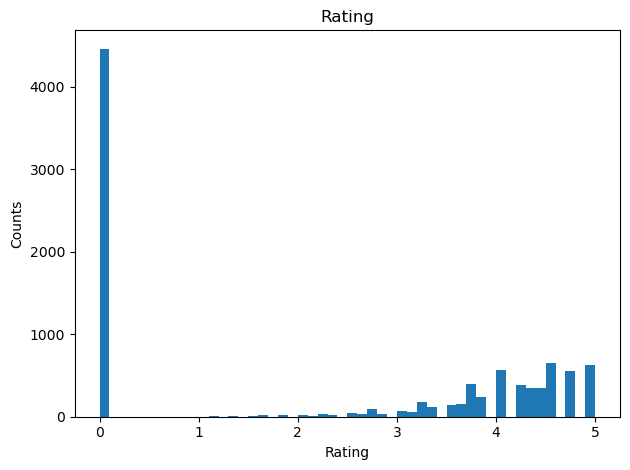

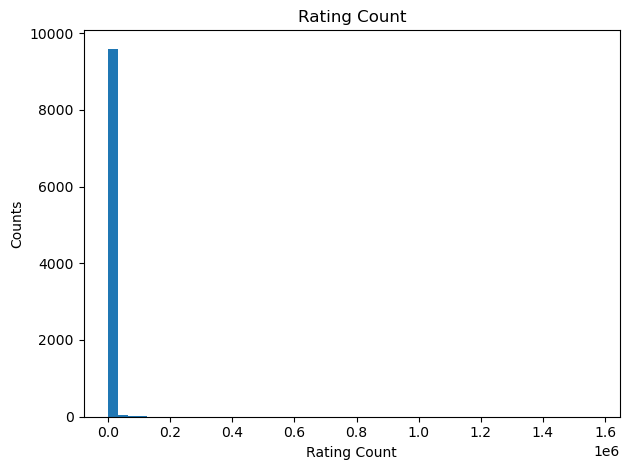

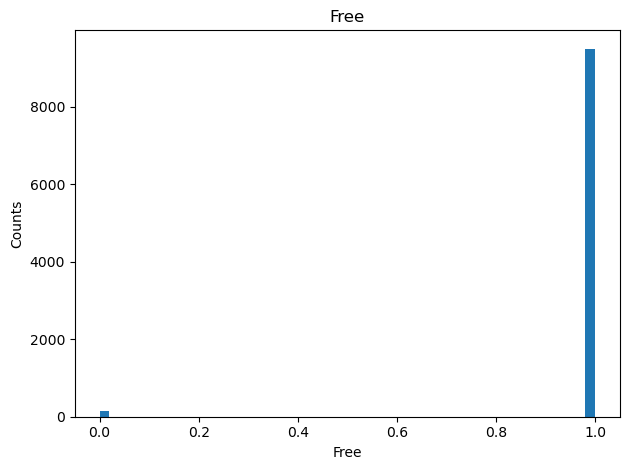

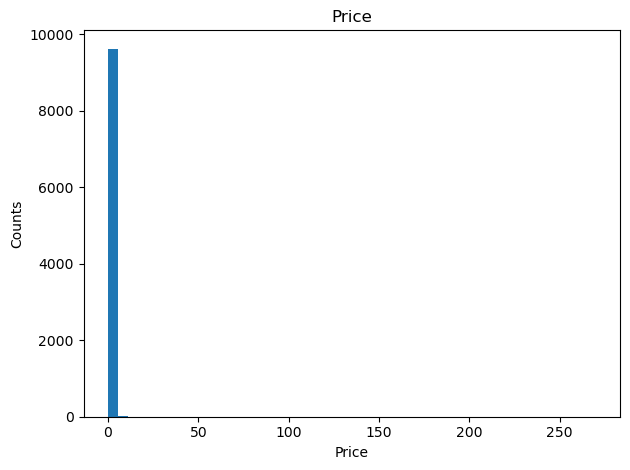

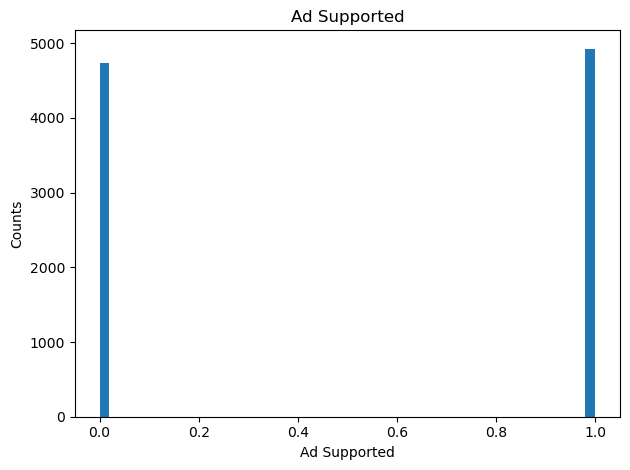

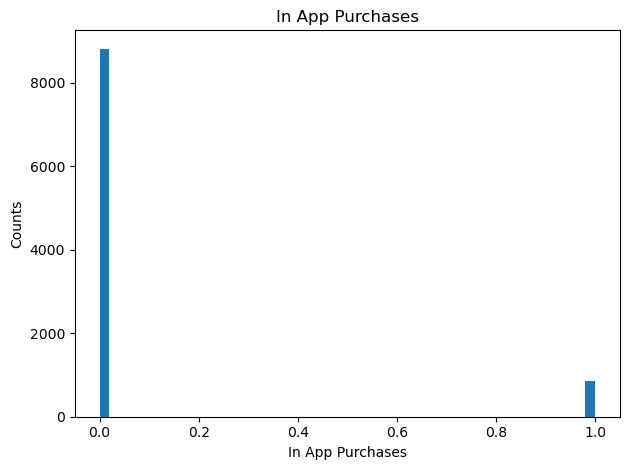

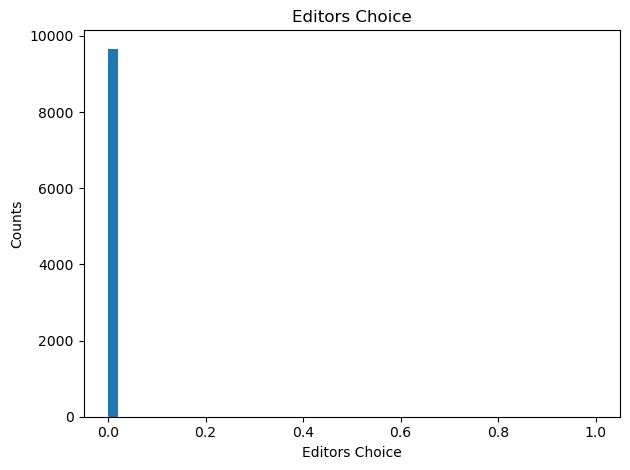

In [9]:
for column in numeric_df:
    plt.figure()
    plt.hist(df_clean[column], bins=50)
    plt.title(column)
    plt.ylabel('Counts')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

We can see that most of the application are rated 0
Most of the application are free
There is half of application ad supported and half non ad supported.
Most application does not have in app purchases 
None of the applications is editor choices. 

### Step 2: Bivariate Analysis (target variable = Rating)

Our target variable is Rating, we need to analyse the relationship between this variable and our categorical and numerical values.

#### Categorical 

In [10]:
df_clean.groupby('Rating').value_counts()

Rating  Category   Rating Count  Free  Price  Content Rating  Ad Supported  In App Purchases  Editors Choice
0.0     Business   0.0           1     0.0    Everyone        0             0                 0                 360
        Education  0.0           1     0.0    Everyone        0             0                 0                 282
        Lifestyle  0.0           1     0.0    Everyone        0             0                 0                 168
        Education  0.0           1     0.0    Everyone        1             0                 0                 161
        Shopping   0.0           1     0.0    Everyone        0             0                 0                 155
                                                                                                               ... 
5.0     Business   13.0          1     0.0    Everyone        0             0                 0                   1
                   12.0          1     0.0    Teen            0             0  

In [11]:
df_clean['Rating'].value_counts()

Rating
0.0    4460
5.0     421
4.2     389
4.4     352
4.3     344
4.5     333
4.6     313
4.1     291
4.7     285
4.0     279
4.8     272
3.9     243
3.8     208
4.9     205
3.7     191
3.6     157
3.5     144
3.4     116
3.3      97
3.2      83
3.0      74
3.1      62
2.8      52
2.5      46
2.9      39
2.7      38
2.6      28
2.3      20
2.2      18
2.0      18
2.4      17
1.8      14
2.1      14
1.6      12
1.9       7
1.5       6
1.4       6
1.7       3
1.3       3
1.2       2
1.1       1
Name: count, dtype: int64

In [12]:
df_clean.groupby('Rating')['Category'].value_counts()

Rating  Category     
0.0     Education        487
        Business         408
        Music & Audio    359
        Lifestyle        273
        Tools            249
                        ... 
5.0     Weather            1
        Board              1
        Strategy           1
        Racing             1
        Word               1
Name: count, Length: 1085, dtype: int64

In [13]:
df_clean.groupby('Rating')['Content Rating'].value_counts()

Rating  Content Rating
0.0     Everyone          3943
        Teen               359
        Mature 17+         110
        Everyone 10+        48
1.1     Everyone             1
                          ... 
4.9     Mature 17+           3
5.0     Everyone           377
        Teen                37
        Mature 17+           4
        Everyone 10+         3
Name: count, Length: 131, dtype: int64

#### Numerical

In [14]:
print(numeric_df)

      Rating  Rating Count  Free  Price  Ad Supported  In App Purchases  \
0        3.9          68.0     1    0.0             0                 0   
1        0.0           0.0     1    0.0             0                 0   
2        4.3         918.0     1    0.0             1                 0   
3        5.0           6.0     1    0.0             0                 0   
4        4.3         830.0     1    0.0             1                 0   
...      ...           ...   ...    ...           ...               ...   
9658     0.0           0.0     1    0.0             0                 0   
9659     4.3         142.0     1    0.0             0                 0   
9660     5.0           9.0     1    0.0             1                 0   
9661     0.0           0.0     1    0.0             1                 0   
9662     4.9          19.0     1    0.0             1                 0   

      Editors Choice  
0                  0  
1                  0  
2                  0  
3      

In [15]:
df_clean.groupby('Rating')['Free'].value_counts()

Rating  Free
0.0     1       4400
        0         60
1.1     1          1
1.2     1          2
1.3     1          2
                ... 
4.8     0          8
4.9     1        200
        0          5
5.0     1        417
        0          4
Name: count, Length: 67, dtype: int64

In [16]:
df_clean.groupby('Rating')['Price'].value_counts()

Rating  Price
0.0     0.00     4400
        0.99       22
        2.99        4
        1.49        3
        8.99        3
                 ... 
5.0     0.00      417
        1.49        1
        1.99        1
        0.99        1
        14.99       1
Name: count, Length: 154, dtype: int64

In [17]:
df_clean.groupby('Rating')['Ad Supported'].value_counts()

Rating  Ad Supported
0.0     0               2568
        1               1892
1.1     0                  1
1.2     0                  2
1.3     0                  2
                        ... 
4.8     1                127
4.9     0                110
        1                 95
5.0     0                228
        1                193
Name: count, Length: 79, dtype: int64

In [18]:
df_clean.groupby('Rating')['In App Purchases'].value_counts()

Rating  In App Purchases
0.0     0                   4297
        1                    163
1.1     0                      1
1.2     0                      2
1.3     0                      3
                            ... 
4.8     1                     25
4.9     0                    185
        1                     20
5.0     0                    395
        1                     26
Name: count, Length: 76, dtype: int64

In [19]:
df_clean.groupby('Rating')['Editors Choice'].value_counts()

Rating  Editors Choice
0.0     0                 4460
1.1     0                    1
1.2     0                    2
1.3     0                    3
1.4     0                    6
1.5     0                    6
1.6     0                   12
1.7     0                    3
1.8     0                   14
1.9     0                    7
2.0     0                   18
2.1     0                   14
2.2     0                   18
2.3     0                   20
2.4     0                   17
2.5     0                   46
2.6     0                   28
2.7     0                   38
2.8     0                   52
2.9     0                   39
3.0     0                   74
3.1     0                   62
3.2     0                   83
3.3     0                   97
3.4     0                  116
3.5     0                  144
3.6     0                  157
3.7     0                  191
3.8     0                  208
3.9     0                  243
4.0     0                  279
4.1     0       

c:\Users\lelon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

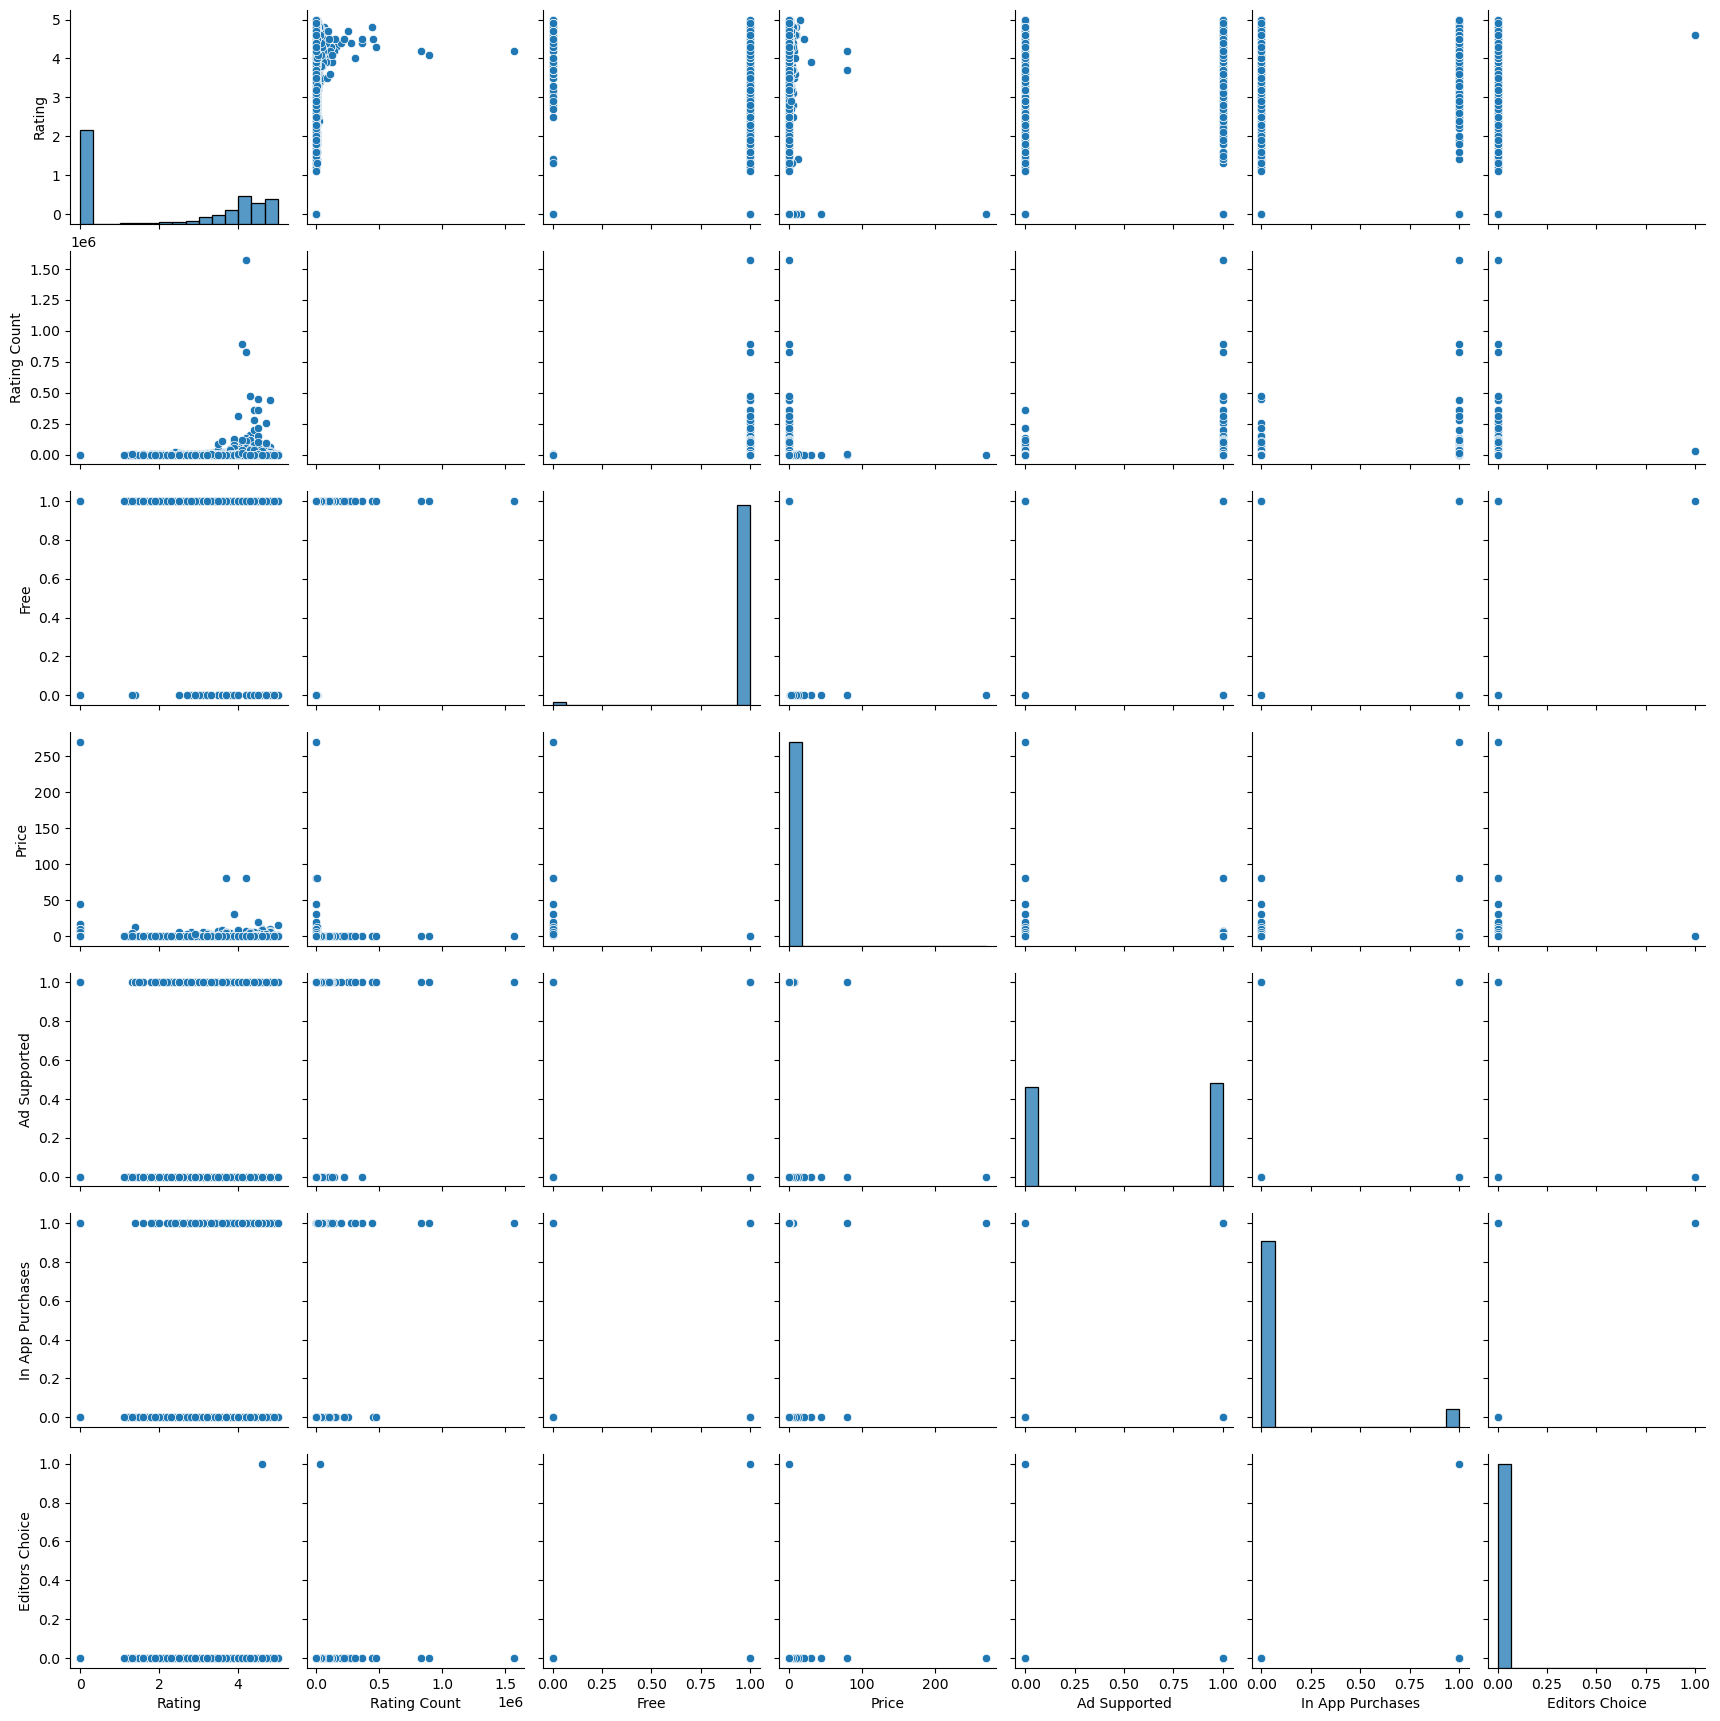

In [24]:
sns.pairplot(df_clean.select_dtypes(include=['int64', 'bool', 'float']))

c:\Users\lelon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


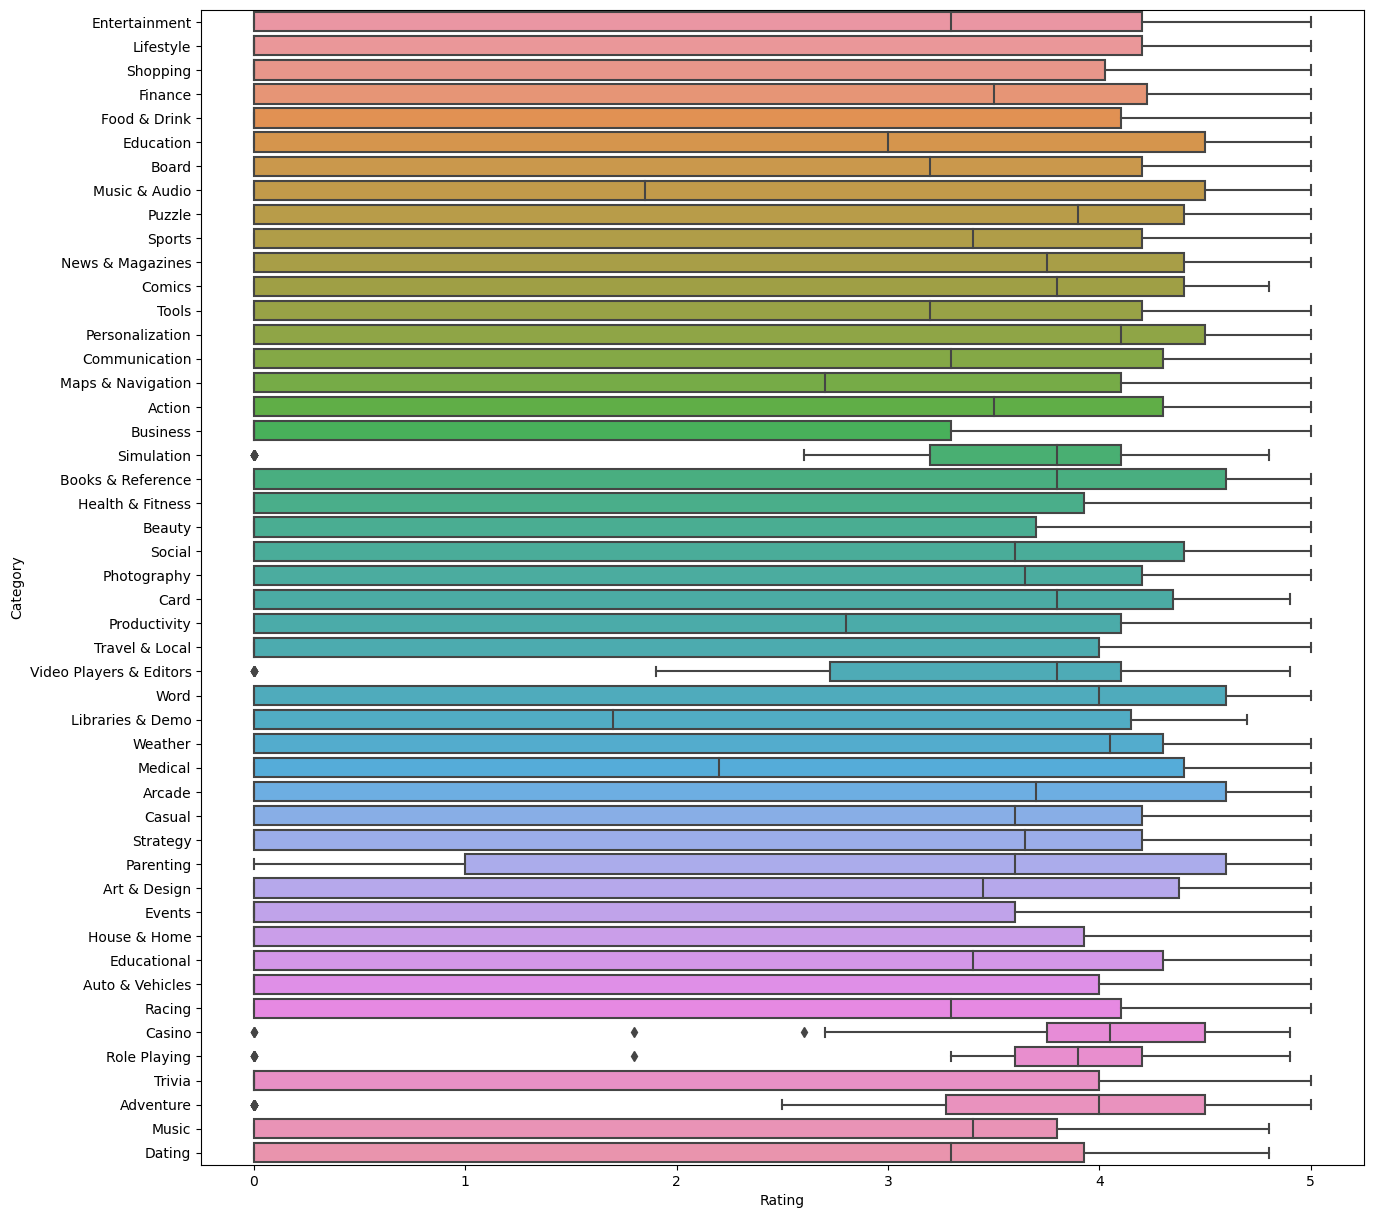

In [46]:
plt.figure(figsize = (15, 15) )
sns.boxplot(data = df_clean, x= 'Rating', y= 'Category')
plt.savefig('boxplot.png')
plt.show()

c:\Users\lelon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


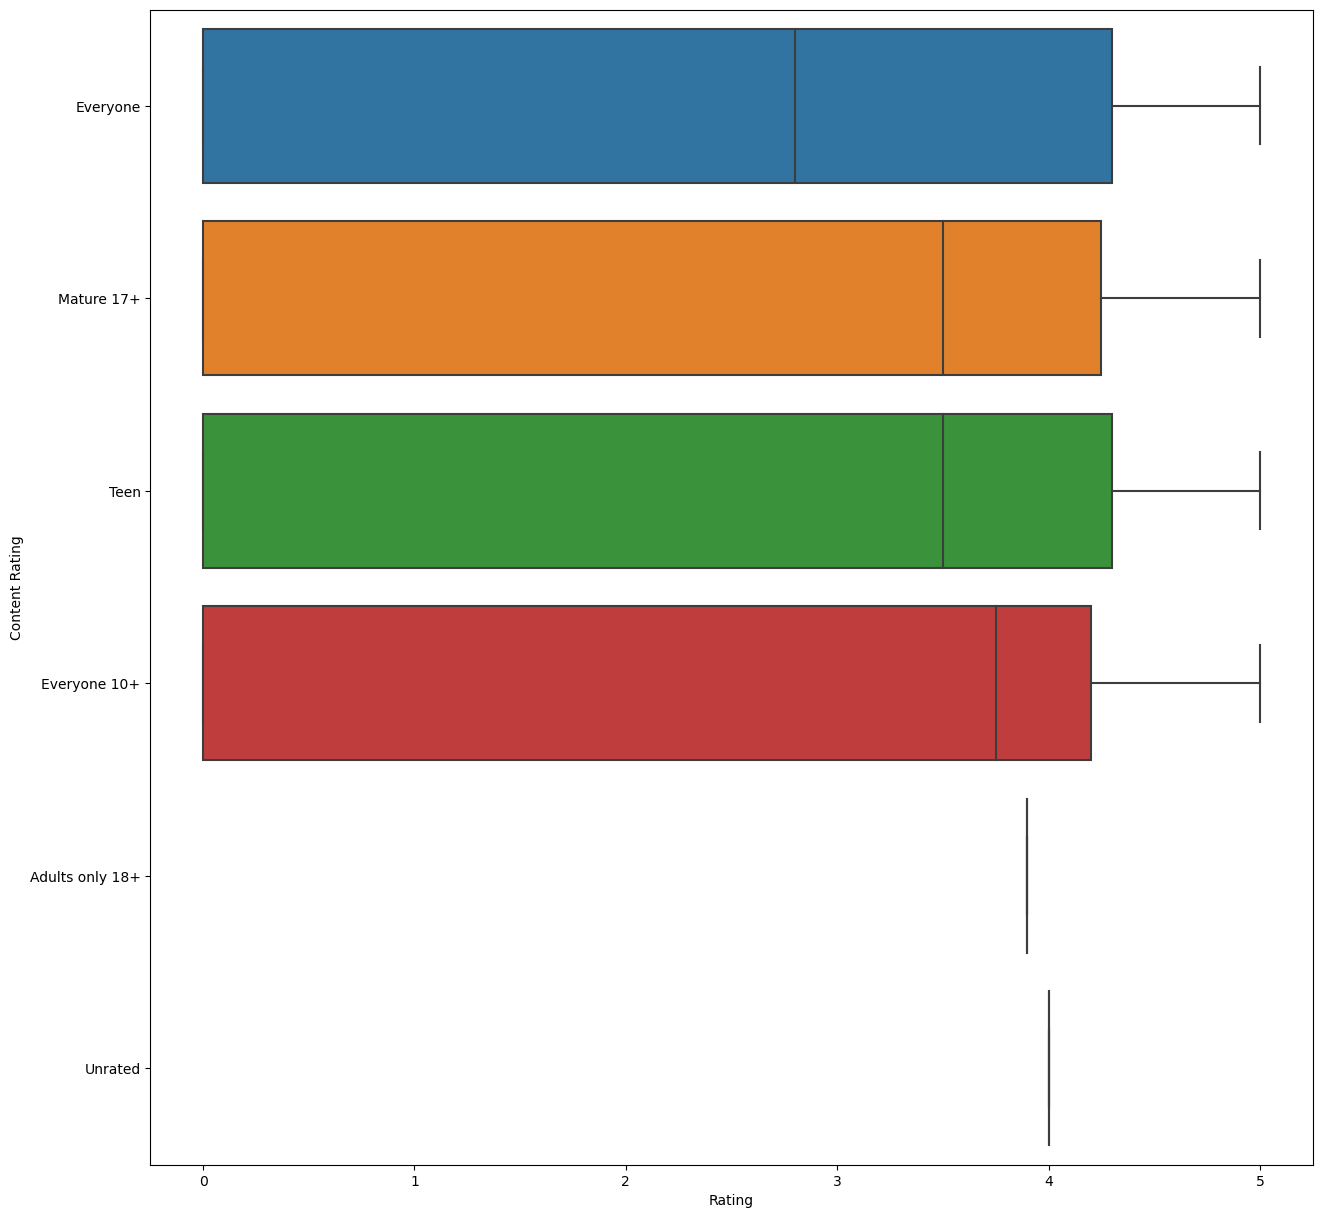

In [40]:
plt.figure(figsize = (15, 15) )
sns.boxplot(data = df_clean, x= 'Rating', y= 'Content Rating')
plt.show()

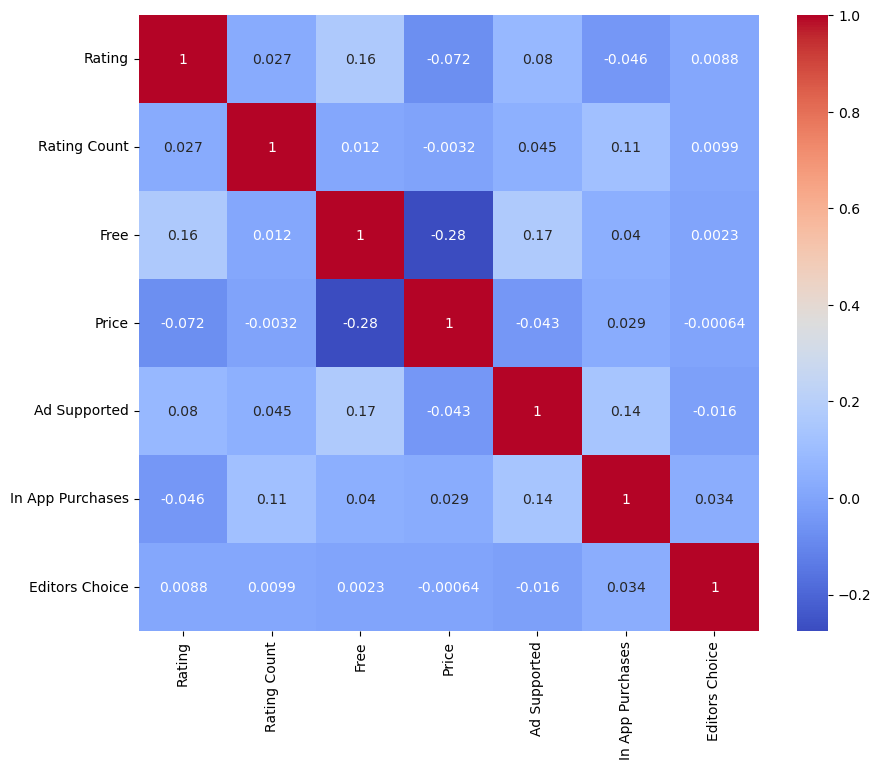

In [ ]:
columns = ['Rating', 'Rating Count', 'Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice']
correlation_matrix = df_clean[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.show()

We can see that our target variable Rating correlation is not really strong with the other columns.